In [1]:
import pygmt
import pandas as pd

In [2]:
df = pd.read_csv('PP100_cluster.csv')

In [16]:
lesser = [6,11,21,18,5,9,14]
armenia = [10,3,16]
ZARN = [1]

In [34]:
Lesser = pd.DataFrame()
for m in lesser:
    df_ = df[df['cluster']==m]
    Lesser = pd.concat([Lesser, df_])
    
Armenia = pd.DataFrame()
for a in armenia:
    df_ = df[df['cluster']==a]
    Armenia = pd.concat([Armenia, df_])
    
ZARN = df[df['cluster']==1]
    

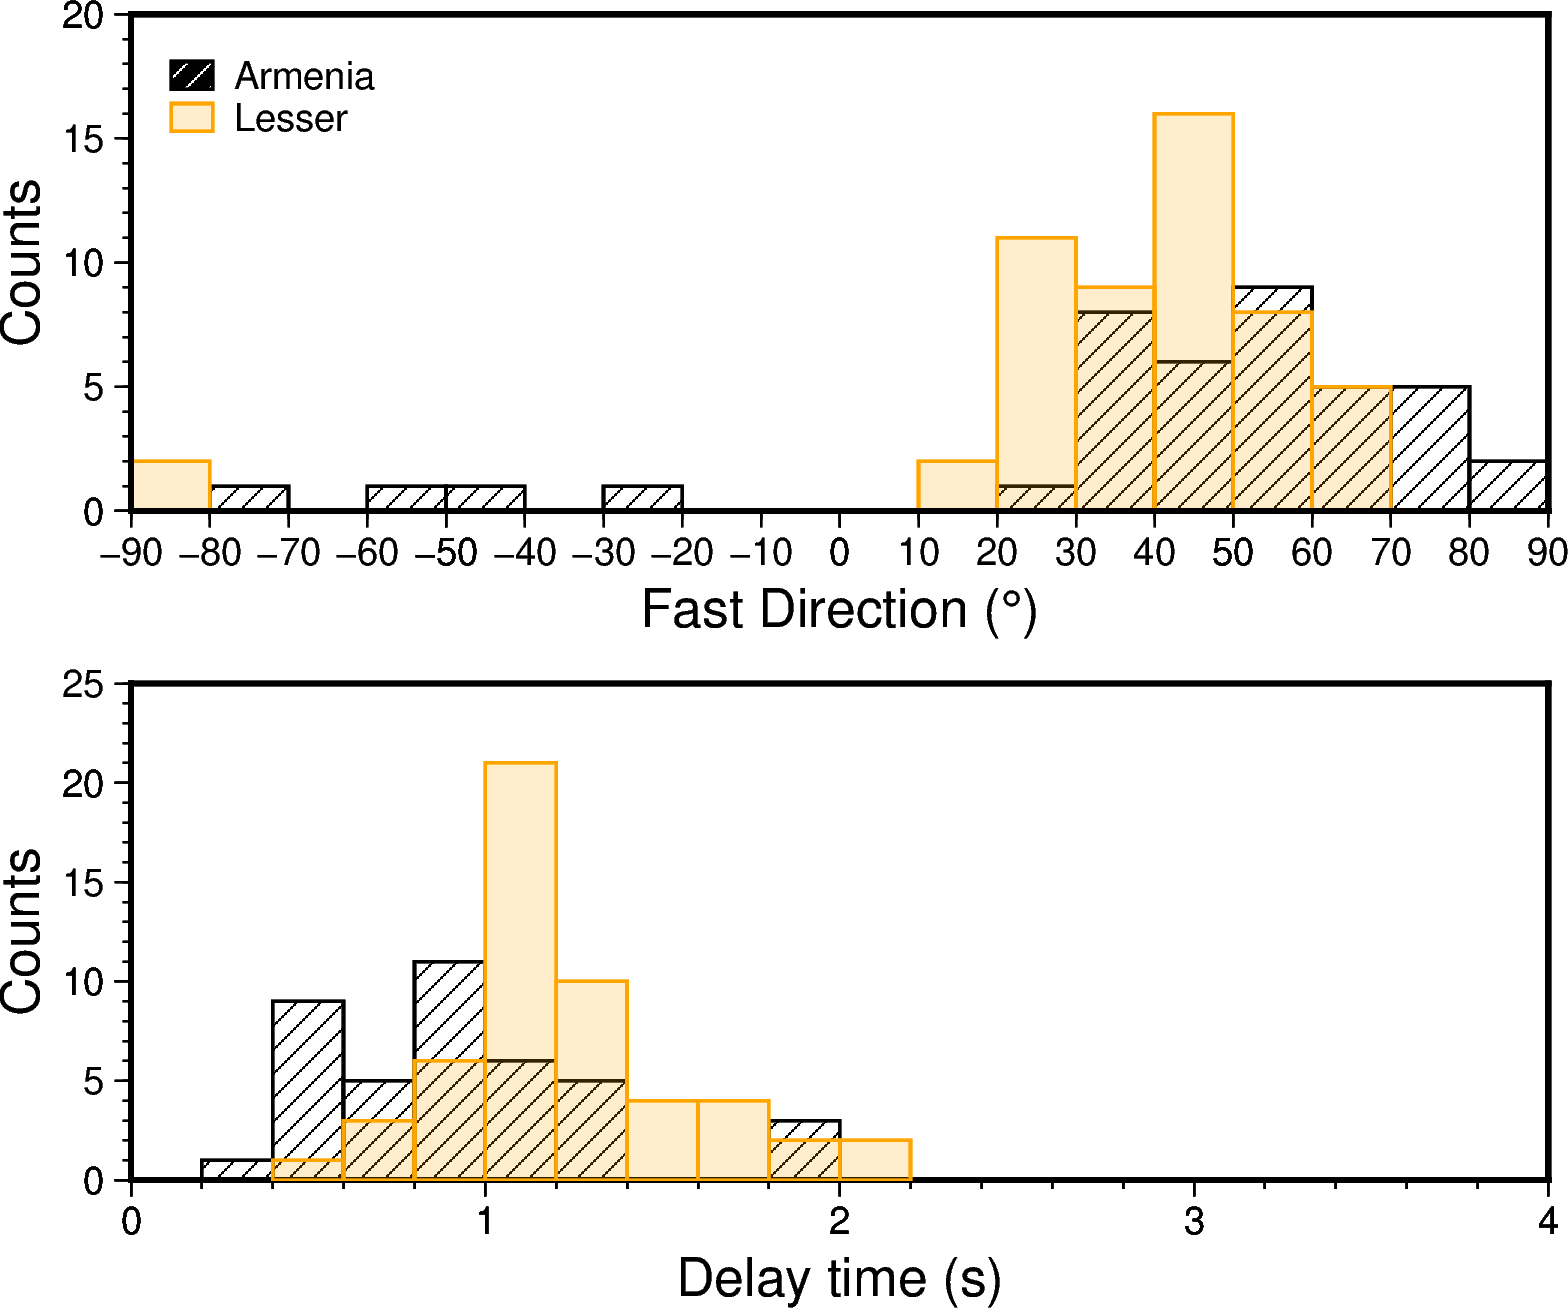

In [61]:
fig = pygmt.Figure()
# -Gp解析度/種類代碼:B背景色F前景色
with fig.subplot(nrows=2, ncols=1, figsize=("12c", "10c"), frame=["af", "WS"],
    margins=["0.1c", "0.5c"]):
    fig.basemap(region=[-90, 90, 0, 20], projection="X?", frame=["xa10f10", "ya10f5", "WS"], panel=[0])
    fig.histogram(
        data=Armenia['phi'],
        series=10, fill="p200/8:BwhiteFblack", pen="0.8p", histtype=0, label='Armenia')
    fig.histogram(
        data=Lesser['phi'],
        frame=[ 'x+l"Fast Direction (\\260)"', 'y+l"Counts"'],
        series=10, fill='orange@80', pen='0.8p,orange', histtype=0, label='Lesser')
#     fig.histogram(
#         data=ZARN['phi'],
#         frame=[ 'x+l"Fast Direction (\\260)"', 'y+l"Counts"'],
#         series=10, fill='blue@80', pen='0.8p,blue@80', histtype=0, label='ZARN')
    
    
    fig.legend(position='JTL+jTL+o0.2c')
#     fig.text(x=-90,y=85,text='SC = Pos: 45.8\\260+15.7 1.17+0.45s, Neg: -56\\260+18 0.87+0.36s',justify='LT',no_clip=True)
#     fig.text(x=-90,y=80,text='RC = Pos: 44.8\\260+12.2 1.06+0.40s, Neg: -57\\260+14 0.73+0.26s',justify='LT',no_clip=True)
    fig.basemap(region=[0, 4, 0, 25], projection="X?", frame=['xa1f0.2','ya10f5', "WS"], panel=[1, 0])
    fig.histogram(
        data=Armenia['dt'],
        frame=[ 'x+l"Delay time (s)"', 'y+l"Counts"'],
        series=0.2, histtype=0, fill="p200/8:BwhiteFblack", pen="0.8p")
    fig.histogram(
        data=Lesser['dt'],
        series=0.2, histtype=0, pen='0.8p,orange', fill='orange@80')
#     fig.histogram(
#         data=ZARN['dt'],
#         frame=[ 'x+l"Delay time (s)"', 'y+l"Counts"'],
#         series=0.2, fill='blue@80', pen='0.8p,blue@80', histtype=0)


fig.show()
fig.savefig('Lesser_AM_compare_PP100.png',dpi=150)
fig.savefig('Lesser_AM_compare_PP100.pdf')

In [62]:
!open .